In [1]:
import numpy as np
arr = np.random.rand(10,3)
def func(x):
    return abs(0.5-x)
print(arr,"\n",np.array([min(arr[i],key = func) for i in range(10)]).reshape(10,1))

[[0.8981335  0.80972221 0.75566434]
 [0.64736413 0.6997052  0.2149469 ]
 [0.20890146 0.03817319 0.52723814]
 [0.17996784 0.18375154 0.41870665]
 [0.2679188  0.48471558 0.22507133]
 [0.57793236 0.21405588 0.81611732]
 [0.02266175 0.0902463  0.83281156]
 [0.31394067 0.97900682 0.65458941]
 [0.05808541 0.86568001 0.56773518]
 [0.75472592 0.41248628 0.17835782]] 
 [[0.75566434]
 [0.64736413]
 [0.52723814]
 [0.41870665]
 [0.48471558]
 [0.57793236]
 [0.83281156]
 [0.65458941]
 [0.56773518]
 [0.41248628]]


In [2]:
import numpy as np
arr = np.random.rand(6,6)
vec = np.array([min(arr.transpose()[i]) for i in range(6)])
print(arr, "\n", np.array([sum(arr[i])/vec[i] for i in range(6)]))

[[0.73380625 0.31258823 0.78977819 0.17640811 0.37431988 0.34419214]
 [0.82690384 0.78706005 0.92773999 0.9313577  0.87012275 0.21022064]
 [0.44374902 0.55039523 0.70124169 0.22674568 0.84876656 0.29276743]
 [0.03718721 0.07720842 0.627416   0.47037161 0.11312387 0.31450884]
 [0.49599255 0.13504636 0.48258642 0.37085399 0.45827843 0.24640543]
 [0.66448643 0.43134318 0.67452414 0.03114217 0.10377624 0.27047106]] 
 [73.44172558 58.97549978  6.34842899 52.65581016 21.09503324 10.34980752]


In [3]:
import numpy as np
x = np.array([6, 2, 0, 3, 0, 0, 5, 7, 0])
y = []
for i in range(1,9):
    if x[i-1] == 0:
        y.append(x[i])
print(x, "\n", max(y))

[6 2 0 3 0 0 5 7 0] 
 5


In [4]:
import numpy as np
x = np.ones(10)
i = np.array([0, 1, 2, 3, 5, 5, 5, 8])
for j in range(8):
    x[i[j]] += 1
print(x)

[2. 2. 2. 2. 1. 4. 1. 1. 2. 1.]


In [5]:
import numpy as np
a = np.arange(16).reshape(4, 4)
for i in range(4):
    a[i] = a[i][::-1]
print(a)
print({i:a.diagonal(3-i).tolist() for i in range(7)})

[[ 3  2  1  0]
 [ 7  6  5  4]
 [11 10  9  8]
 [15 14 13 12]]
{0: [0], 1: [1, 4], 2: [2, 5, 8], 3: [3, 6, 9, 12], 4: [7, 10, 13], 5: [11, 14], 6: [15]}


260.0216198484193


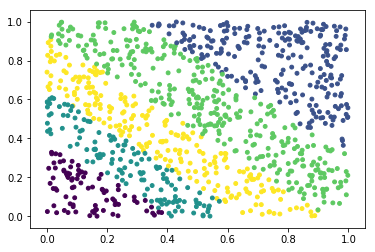

In [8]:
import numpy as np
import matplotlib.pyplot as plt
def _kmeans(data, k):
    cts = np.random.rand(k,2)
    codebook_old = []
    while True:
        codebook = np.array([np.array([np.linalg.norm(data[i] - cts[j]) for j in range(k)]).argmin() for i in range(1000)])
        if (np.array_equal(codebook, codebook_old)):
            break
        cts1 = np.array([np.mean([data[i][0] for i in range(1000) if codebook[i] == j] + [cts[j][0]]) for j in range(k)]).reshape(k,1)
        cts2 = np.array([np.mean([data[i][0] for i in range(1000) if codebook[i] == j] + [cts[j][1]]) for j in range(k)]).reshape(k,1)
        cts = np.array([[cts1[i],cts2[i]] for i in range(k)]).reshape(k,2)
        codebook_old = codebook
    d = 0
    for j in range(1000):
        d += np.linalg.norm(data[j] - cts[codebook[j]])
    return [codebook, d]
k = 5
data = np.random.rand(1000,2)
[codebook, d] = _kmeans(data, k)
print(d)
plt.scatter(*data.T, c = codebook, s=15)
plt.show()